<a href="https://colab.research.google.com/github/sanjoy-kumar/Machine-Learning/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Liabraies**


In [ ]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
from math import sqrt
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score,train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

**Create Random Number**

Q1. Answer


In [ ]:
def randomNumber(sampleNumber):
    x = []
    y = []

    for i in range(sampleNumber):
        xi = random.uniform(-1,1)
        yi = 0.2*np.power(xi,4)+ 2*np.power(xi,3)+ 0.1*np.power(xi,2)+10
        x.append(xi)
        y.append(yi)
    return x,y


**Shuffling Data**

Q2. Answer

In [ ]:
def shufflingData(x,y,isShuffled):
    X = x
    Y = y
    if isShuffled == '1':
        X,Y = shuffle(X,Y,random_state = 0)
        isShuffled = 'Shuffled'
    else:
        isShuffled = 'Un-shuffled'
    return X,Y,isShuffled

**Spliting Data for Training, Validation and Testing**

Q3. Answer


In [ ]:
def splitData(x,y,testRatio): 
    xTrain,xTest,yTrain,yTest = train_test_split(x, y, test_size= 1 - testRatio)
    return xTrain,xTest,yTrain,yTest

**Scale 0 to 1**

Q4. Answer

In [ ]:
def normalize(value, min, max):
    normalized = (value - min) / (max - min)
    return normalized

**Regression Model Accuracy (MAE, MSE, RMSE, R-squared) Check**

Q5. Answer

In [ ]:
# true: Array of true target variable
# pred: Array of predictions

def evaluteError(true,pred):
    diff = true - pred
    meanValue = np.mean(true)
    mseT = np.sum(diff**2)
    maeT = np.sum(np.abs(diff))
    rmseT = np.sqrt(mseT)
    r2T = 1 - (np.sum(diff**2)/np.sum(true - meanValue)**2)
    mse = mseT/len(true)
    mae = maeT/len(true)
    rmse = rmseT/len(true)
    r2 = r2T/len(true)

    return mae,mse,rmse,r2

**Structure 1:** 

3 hidden layer Dense (12, 8 and 4 Units) Neural Networks





In [ ]:
# Structure 1: FCL (12,8 and 4 units) => three hidden layers

def build_and_compile_model_1(norm,activationMethod):
    model = keras.Sequential([
      norm,
      layers.Dense(12, activation=activationMethod),
      layers.Dense(8, activation=activationMethod),
      layers.Dense(4, activation=activationMethod),
      layers.Dense(1)])
    model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
    return model

**Structure 2:**

One hidden layer Dense (24 Units) Neural Networks



In [ ]:
# Structure 2: FCL (24 units ) => one hidden layer

def build_and_compile_model_2(norm,activationMethod):
    model = keras.Sequential([
      norm,
      layers.Dense(24, activation=activationMethod),
      layers.Dense(1)])
    model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
    return model

**Main Function**

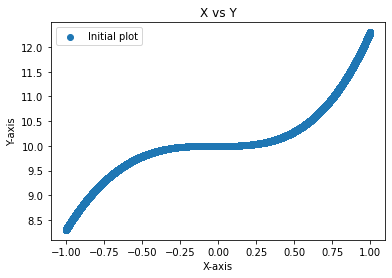

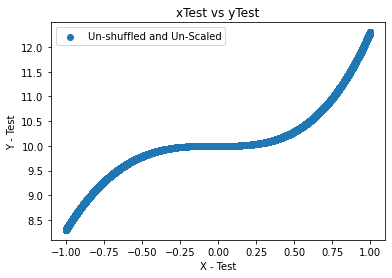

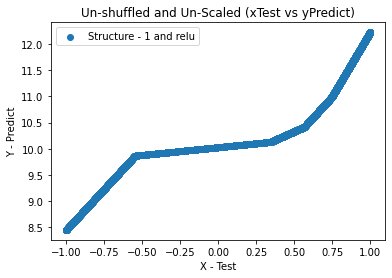

The model performance for testing set
--------------------------------------
MAE is 0.0435230639336806
MSE is 0.002638908084610385
RMSE is 0.05137030352850161
R2 score is 0.995434048539629


In [ ]:
# -------------------------Input collection from user------------------------------
# Edit '1' for shuffling data and '2' for un-shuffling data.
# Edit '1' for scaling data and '2' for un-scaling data.
# Edit 'relu' for activation function relu and 'tanh' for activation function tanh
# Edit '1' for structure-1 and '2' for structure-2.

isShuffled = '2'
isScaled = '2'
activationMethod = 'relu'
structureSelect = '1'


# -----------------------Random number generation---------------------------------
N = 30000
X,Y=randomNumber(N)

# --------------Initial plot of the random numbers(30000) X vs Y ----------------

plt.scatter(X,Y,label='Initial plot')
plt.title("X vs Y")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

#--------------- Data shuffling or un-shuffling -----------------------------

X,Y,isShuffled = shufflingData(X,Y,isShuffled)

# -------------- Data Scaling or un-scaling-------------------------------

if isScaled == '1':
    # Scale x value 0 to 1
    minX= min(X)
    maxX= max(X)
    X_new = normalize(np.array(X),minX,maxX) 
    # Scale y value 0 to 1
    minY= min(Y)
    maxY= max(Y)
    Y_new = normalize(np.array(Y),minY,maxY)
    isScaled = 'Scaled'
else:
    X_new = X
    Y_new = Y
    isScaled = 'Un-Scaled'

# ---------------------- Spliting Data---------------------
testRatio = 0.5
xTrain,xTest,yTrain,yTest = splitData(X_new,Y_new,testRatio)
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)
xTest  = np.array(xTest)
yTest  = np.array(yTest)


label1 = isShuffled + ' and ' + isScaled

# ------------------------ xTest vs yTest-----------------

plt.scatter(xTest,yTest,label= label1)
plt.title("xTest vs yTest")
plt.xlabel("X - Test")
plt.ylabel("Y - Test")
plt.legend()
plt.show()

X_ = np.array(X)
X_normalizer = preprocessing.Normalization(input_shape=[1,])
X_normalizer.adapt(X_)

# --------------------Build and Compile Model ---------------------------  

if structureSelect == '1':
    model = build_and_compile_model_1(X_normalizer,activationMethod)
elif structureSelect == '2':
    model = build_and_compile_model_2(X_normalizer,activationMethod)
else:
    print("Sorry!!! Please select correct structure or model.")

# validation data(6000) is 40 % of Train Data (15,000) equivalent to 20% of Actual Data(30,000)

history = model.fit(xTrain,yTrain,epochs=20,batch_size=12,verbose=0,validation_split = 0.4) 
yPredict = model.predict(xTest)


# -------------- xTest vs yPredict------------------------------------

label2 = "Structure - " + structureSelect + " and " + activationMethod
label3 = label1 + " (xTest vs yPredict)"
plt.scatter(xTest,yPredict,label=label2)
plt.title(label3)
plt.xlabel("X - Test")
plt.ylabel("Y - Predict")
plt.legend()
plt.show()

# ---------------------model evaluation for testing set--------------------------

mae = metrics.mean_absolute_error(yTest, yPredict)
mse = metrics.mean_squared_error(yTest, yPredict)
rmse = sqrt(mse)
r2 = metrics.r2_score(yTest, yPredict)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))



